In [19]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

data = pd.read_csv("Train_data.csv")

print(data.info())

numeric_data = data.drop(columns=["protocol_type", "service", "flag", "class"])

label_encoder = LabelEncoder()
data["protocol_type"] = label_encoder.fit_transform(data["protocol_type"])
data["service"] = label_encoder.fit_transform(data["service"])
data["flag"] = label_encoder.fit_transform(data["flag"])

data['class'] = data['class'].apply(lambda x: 1 if x == 'anomaly' else 0)

x = data.drop(columns=["class"])
y = data["class"]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     92 non-null     int64  
 1   protocol_type                92 non-null     object 
 2   service                      92 non-null     object 
 3   flag                         92 non-null     object 
 4   src_bytes                    92 non-null     int64  
 5   dst_bytes                    92 non-null     int64  
 6   land                         92 non-null     int64  
 7   wrong_fragment               92 non-null     int64  
 8   urgent                       92 non-null     int64  
 9   hot                          92 non-null     int64  
 10  num_failed_logins            92 non-null     int64  
 11  logged_in                    92 non-null     int64  
 12  num_compromised              92 non-null     int64  
 13  root_shell            

The entropy model's score: 1.0
The gini model's score: 1.0
The logistic model's score: 0.9891304347826086
The Naive Bayes model's score: 0.9565217391304348


C:\Users\VivoBook\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


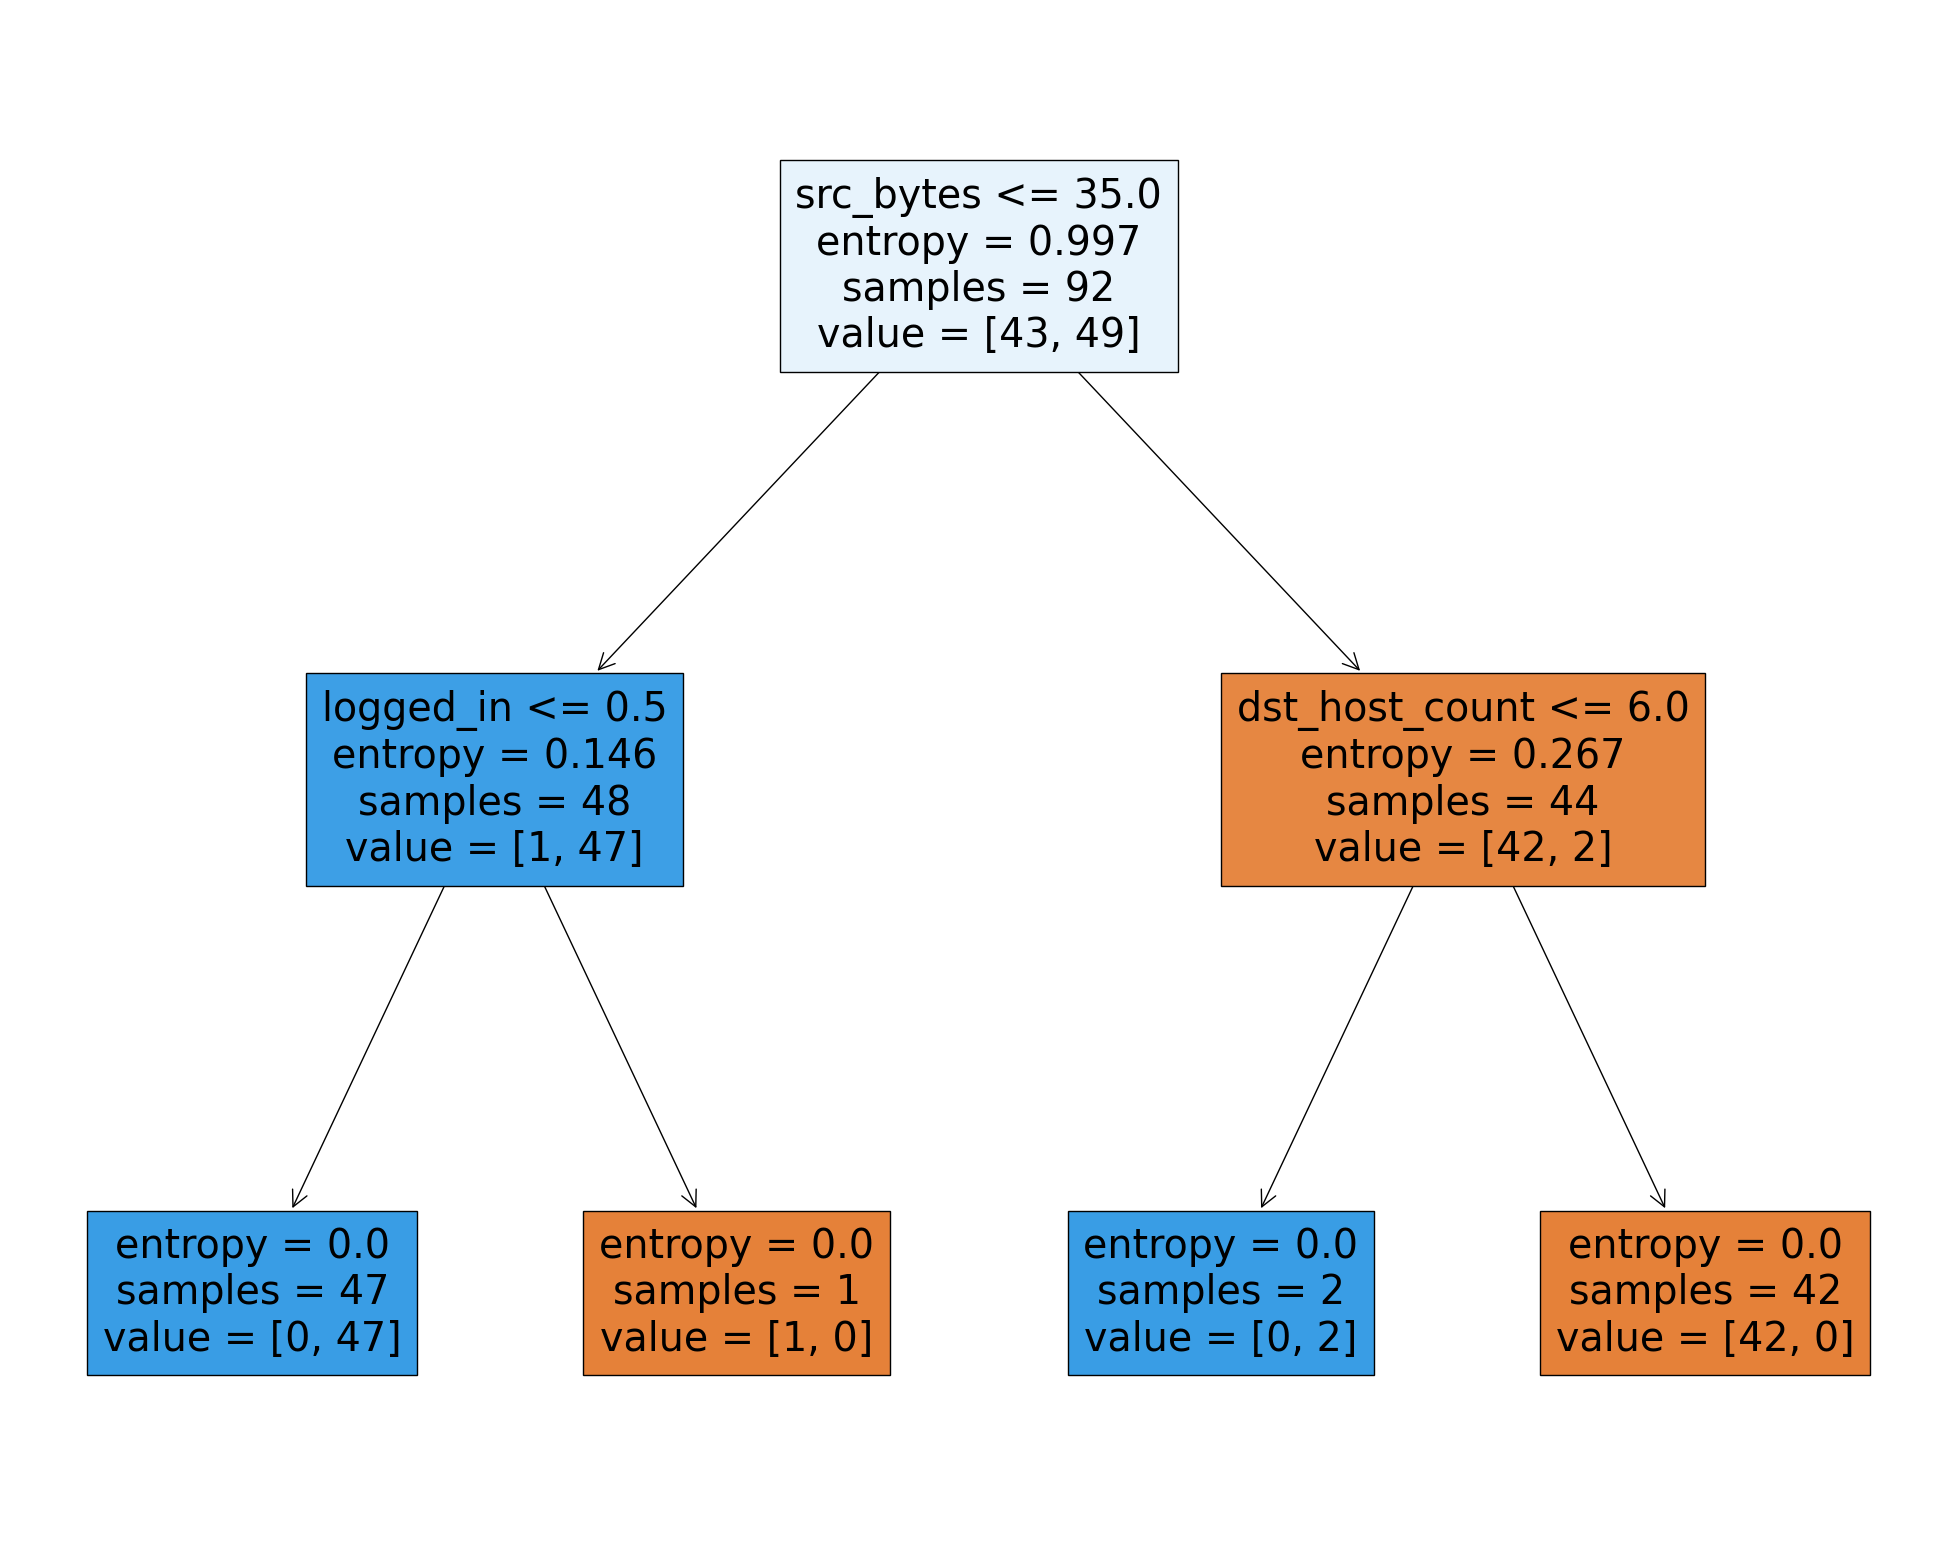

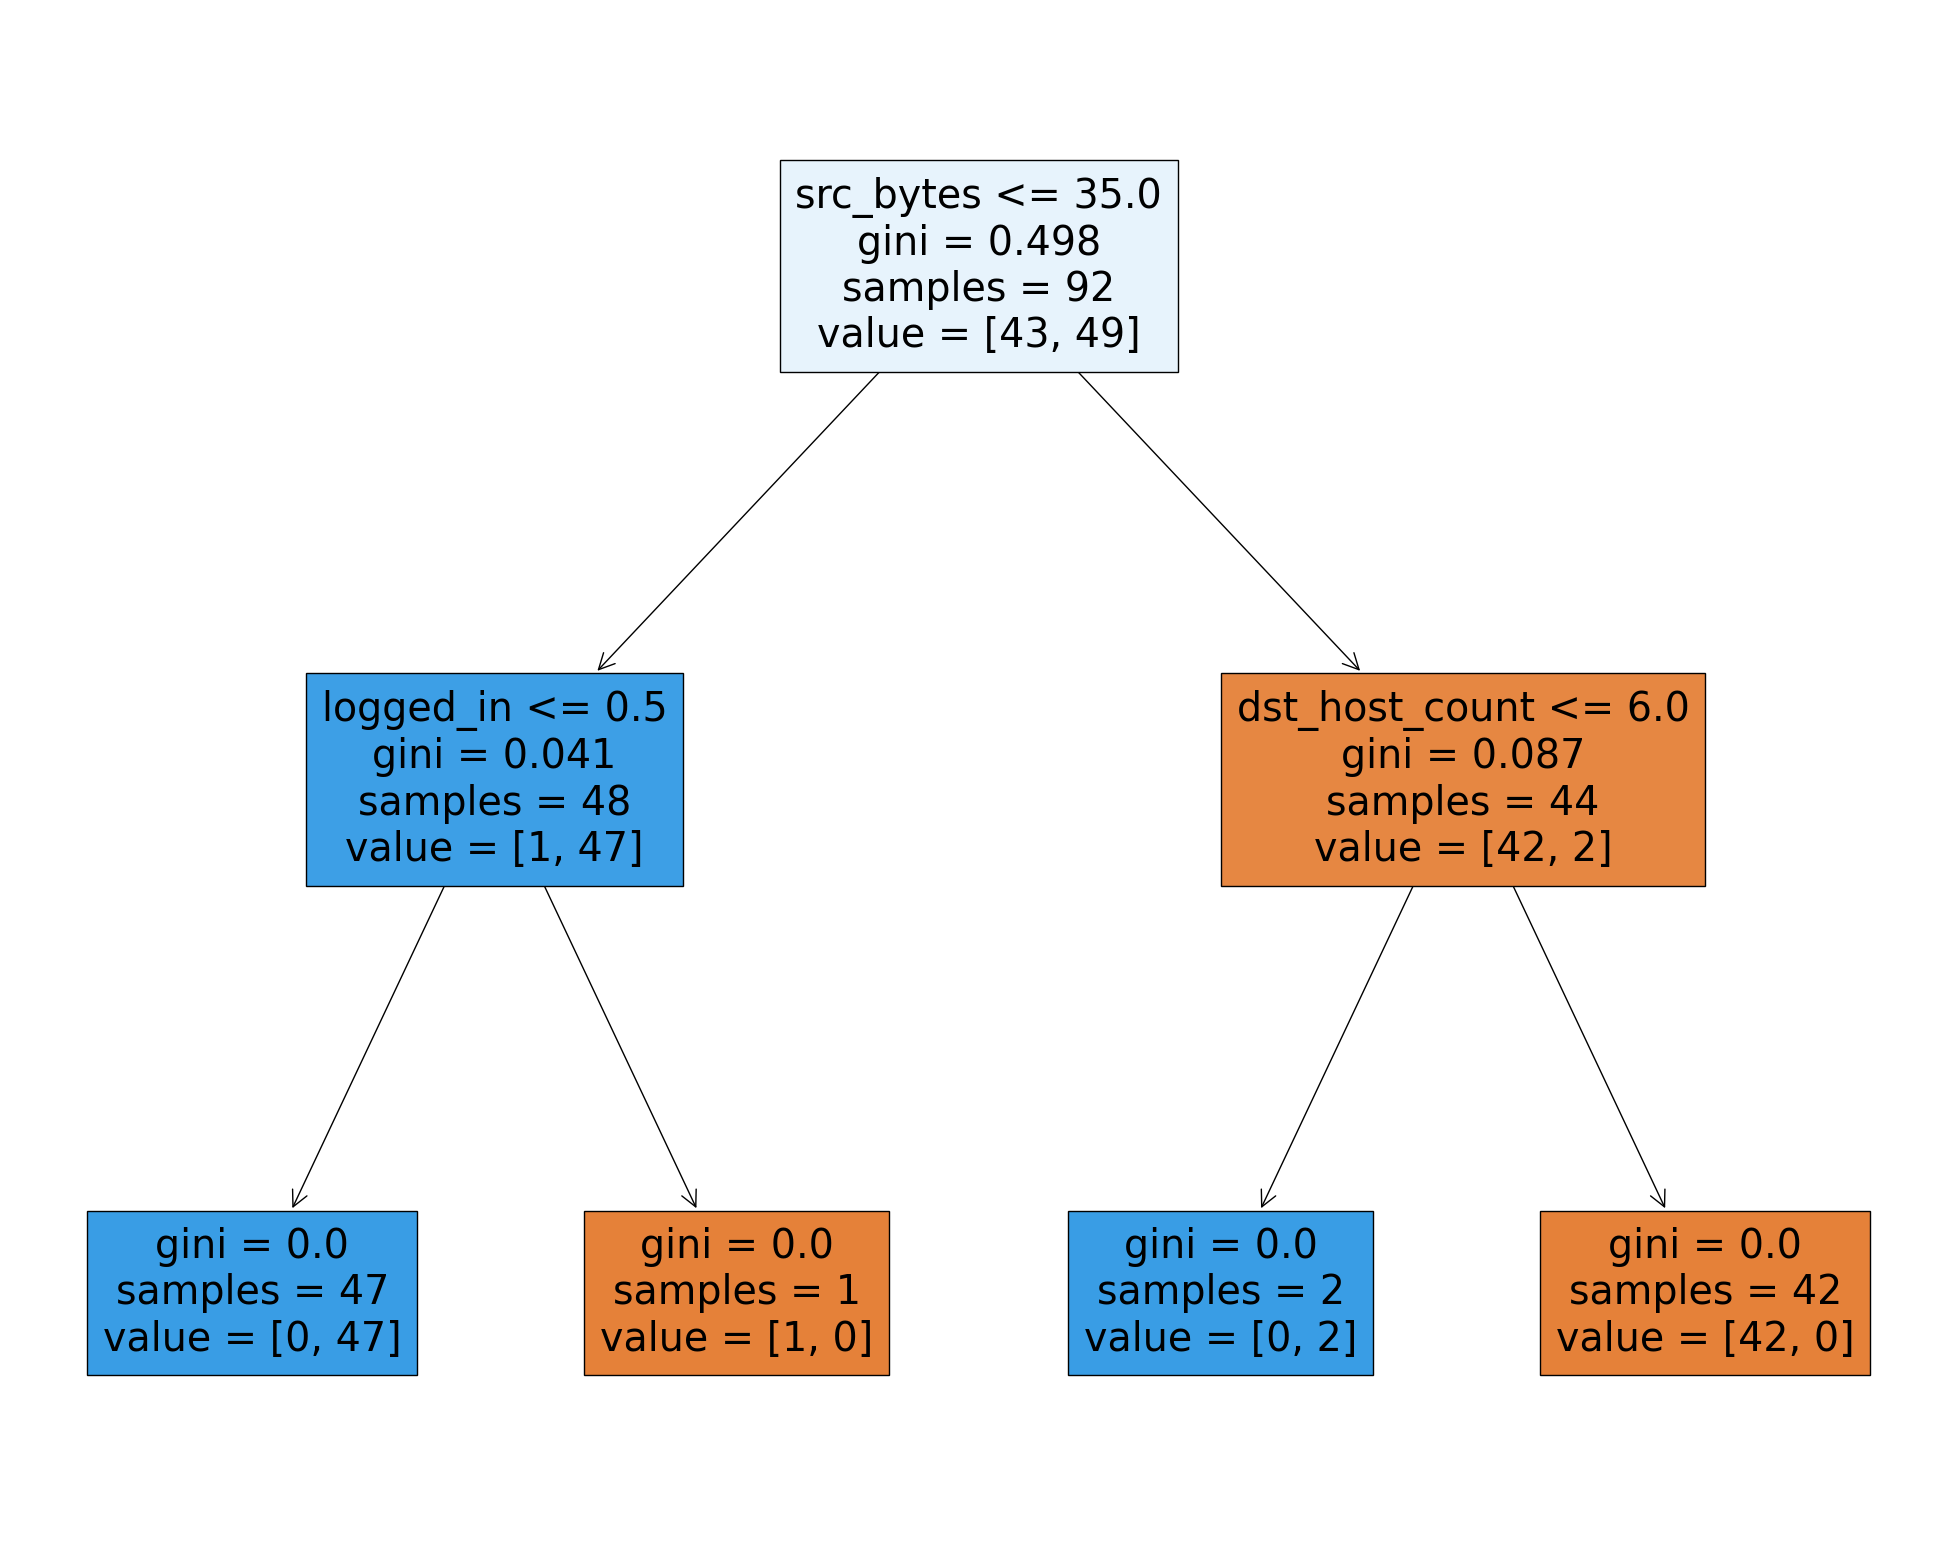

In [20]:
model1 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model1.fit(x, y)
entropy_score = model1.score(x, y)
print(f"The entropy model's score: {entropy_score}")

model2 = DecisionTreeClassifier(criterion='gini', max_depth=3)
model2.fit(x, y)
gini_score = model2.score(x, y)
print(f"The gini model's score: {gini_score}")

logistic_model = LogisticRegression()
logistic_model.fit(x, y)
log_score = logistic_model.score(x, y)
print(f"The logistic model's score: {log_score}")

gnb = GaussianNB()
gnb.fit(x, y)
gnb_score = gnb.score(x, y)
print(f"The Naive Bayes model's score: {gnb_score}")

from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model1, feature_names=x.columns, filled=True)

fig = plt.figure(figsize=(25,20))  
_ = tree.plot_tree(model2, feature_names=x.columns, filled=True)

The KNN model's score: 0.9565217391304348


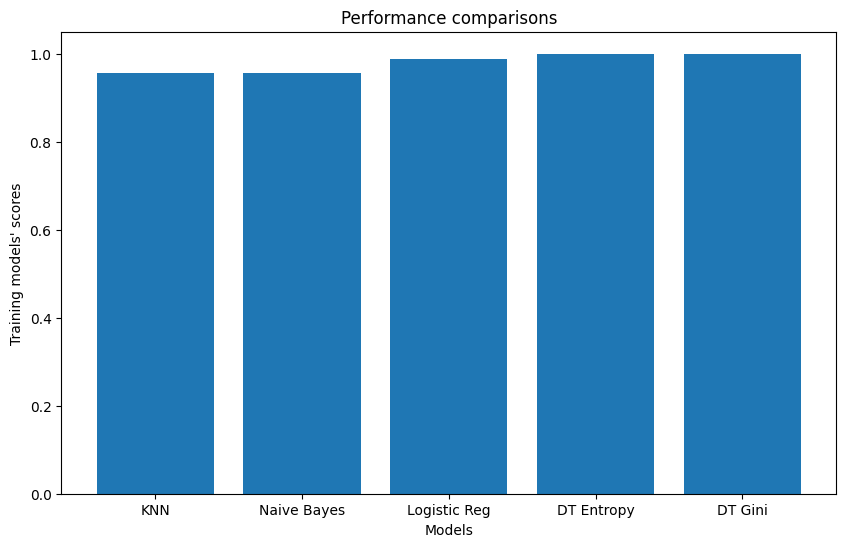

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import math

data_test = pd.read_csv("Test_data.csv")

numeric_data = data_test.drop(columns=["protocol_type", "service", "flag"])

label_encoder = LabelEncoder()
data_test["protocol_type"] = label_encoder.fit_transform(data_test["protocol_type"])
data_test["service"] = label_encoder.fit_transform(data_test["service"])
data_test["flag"] = label_encoder.fit_transform(data_test["flag"])

sc_X = StandardScaler()
x = sc_X.fit_transform(x)
numeric_data = sc_X.fit_transform(numeric_data)

knn_model = KNeighborsClassifier(n_neighbors=math.floor(math.sqrt(len(numeric_data)))-1, p=2, metric='euclidean')
knn_model.fit(x, y)
print(f"The KNN model's score: {knn_model.score(x, y)}")

models = ['KNN', 'Naive Bayes', 'Logistic Reg', 'DT Entropy', 'DT Gini']
scores = [knn_model.score(x, y), gnb_score, log_score,
          entropy_score, gini_score]

plt.figure(figsize=(10, 6))
plt.bar(models, scores)
plt.xlabel('Models')
plt.ylabel('Training models\' scores')
plt.title('Performance comparisons')
plt.show()

After the training process and getting the results, we conclude the following:
- Decision tree models (both entropy and gini) achieved perfect accuracy on the training data, potentially indicating overfitting.
- Logistic Regression achieved a high accuracy score, demonstrating strong performance on the training set.
- Naive Bayes and KNN models achieved decent accuracy scores but slightly lower than logistic regression.